# Python Exercises

#### Written for the Chicago Fed Workshop, May 2016
#### Author: [John Stachurski](http://johnstachurski.net/)

This notebook contains some exercises to accompany the introductory Python session of the Chicago Fed Workshop.  Before attempting the exercises, you need to read through the 'Scientific Python Quickstart' notebook in the same directory.

Solutions are at the end of the notebook.

Execute this next cell so that your figures appear inside the notebook rather than separately.

In [1]:
%matplotlib inline

## Exercises

### Exercise 1

Simulate and plot the correlated time series

$$
    x_{t+1} = \alpha \, x_t + \epsilon_{t+1}
    \quad \text{where} \quad
    x_0 = 0 
    \quad \text{and} \quad t = 0,\ldots,T
$$

Here $\{\epsilon_t\}$ is iid and standard normal.

In your solution, restrict your import statements to

In [2]:
from random import normalvariate
import matplotlib.pyplot as plt

Set $T=200$ and $\alpha = 0.9$

In [3]:
# Put your solution here

### Exercise 2

Generate 10000 data points from the exponential distribution with density

$$
f(x; \alpha) = \alpha \exp(-\alpha x)
\qquad
(x > 0, \alpha > 0)
$$

using `scipy.stats` and taking $\alpha = 0.5$.  Then, after looking up the maximum likelihood estimator of $\alpha$, compute the estimate given your data and check that it is in fact close to $\alpha$.

To solve this exercise you might find the following documentation useful:

* Exponential distribution: https://en.wikipedia.org/wiki/Exponential_distribution

* Distributions and random numbers in SciPy: http://docs.scipy.org/doc/scipy/reference/stats.html



In [4]:
# Put your solution here

### Exercise 3

Using the same data set, implement maximum likelihood again, but this time pretending that you don't know the analytical expression for the maximum likelihood estimator.  Instead, set up the log likelihood function and maximize it numerically using a routine from `scipy.optimize`. (Have a look at the optimization examples from the scientific Python quickstart notebook.)

In [5]:
# Put your solution here

### Exercise 4

Recall that a discrete Lyapunov equation is a matrix equation of the form


\begin{equation}
    X = A X A' + M
\end{equation}


Here all matrices are $n \times n$ and $X$ is the unknown.  $A'$ is the transpose of $A$.  The equation has a unique solution if the spectral radius of $A$ is less than 1.

There is a solver for Lyapunov equations in SciPy.  Let's try it out with these matrices:

In [6]:
import numpy as np
A = np.array([[0, 1],[-1/2, -1]])
M = np.array([[0, 0], [0, 9]])

In [7]:
A

array([[ 0. ,  1. ],
       [-0.5, -1. ]])

In [8]:
M

array([[0, 0],
       [0, 9]])

Here's the solver and the solution.

In [9]:
from scipy.linalg import solve_discrete_lyapunov
solve_discrete_lyapunov(A, M)

array([[ 21.6, -14.4],
       [-14.4,  21.6]])

In fact it's possible to obtain this solution by iteration, starting with a guess $X_0$, such as $X_0 = M$, and then iterating on

$$
    X_{n+1} = A X_n A' + M
$$

Try to obtain the same solution using an iterative scheme.

In [10]:
# Put your solution here

## Solutions

In [11]:
# Print some nonsense to partially hide solutions
filler_text = "solution below\n" * 25
print(filler_text)

solution below
solution below
solution below
solution below
solution below
solution below
solution below
solution below
solution below
solution below
solution below
solution below
solution below
solution below
solution below
solution below
solution below
solution below
solution below
solution below
solution below
solution below
solution below
solution below
solution below



### Solution to Exercise 1

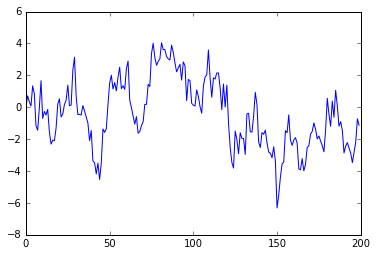

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
from random import normalvariate

alpha = 0.9
ts_length = 200
x = 0

x_values = []
for i in range(ts_length):
    x_values.append(x)
    x = alpha * x + normalvariate(0, 1)
plt.plot(x_values, 'b-')

### Solution to Exercise 2

After checking [the docs for the exponential distribution](http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html) we proceed as follows

In [13]:
from scipy.stats import expon
import numpy as np

alpha = 0.5
n = int(1e5)
ep = expon(scale=1.0/alpha)  # scale controls the exponential parameter
x = ep.rvs(n)

Let's check we've got the right distribution here

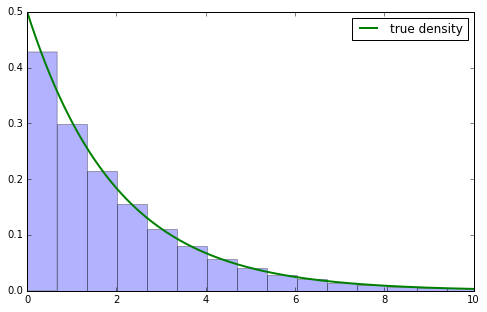

In [14]:
fig, ax = plt.subplots(figsize=(8, 5))
xmin, xmax = 0.001, 10.0
ax.set_xlim(xmin, xmax)
ax.hist(x, normed=True, bins=40, alpha=0.3)
grid = np.linspace(xmin, xmax, 200)
ax.plot(grid, ep.pdf(grid), 'g-', lw=2, label='true density')
ax.legend()

It's [well-known](http://en.wikipedia.org/wiki/Exponential_distribution) that the MLE of $\alpha$ is $1/\bar x$ where $\bar x$ is the mean of the sample.  Let's check that it is indeed close to $\alpha$.

In [15]:
alpha_mle = 1.0 / x.mean()
print("max likelihood estimate of alpha is {}".format(alpha_mle))

max likelihood estimate of alpha is 0.49940968319654644


### Solution to Exercise 3

First let's set up the log likelihood function.

In [16]:
s = x.sum()
def neg_loglike(a):
    return - n * np.log(a) + a * s

This function is minus the log likelihood function for the exponential distribution.

Minimize over a reasonable parameter space

In [17]:
from scipy.optimize import fminbound
fminbound(neg_loglike, 0.01, 10.0)

0.4994081976704941

This is close to the analytical value of the max likelihood estimator we got in exercise 2.

### Solution to Exercise 4

Here are the matrices

In [18]:
A = np.array([[0, 1],[-1/2, -1]])
M = np.array([[0, 0], [0, 9]])

and here's an iterative algorithm that computes the solution.

In [19]:
P = M 
tol = 1e-6
max_iter = 500
current_iter = 0 
error = tol + 1 

while current_iter < max_iter and error > tol:
    P_new = A @ P @ A.T + M 
    error = np.linalg.norm(P - P_new, ord=2)
    P = P_new
    current_iter += 1

print(P)

[[ 21.59999871 -14.39999914]
 [-14.39999914  21.59999925]]


This is close to what we had before:

In [20]:
from scipy.linalg import solve_discrete_lyapunov
solve_discrete_lyapunov(A, M)

array([[ 21.6, -14.4],
       [-14.4,  21.6]])